In [130]:
from src.input_json import file_name, open_json
from src.ffnn import FFNN
import numpy as np

### Defining Forward Propagation Function

In [131]:
def forward_propagation_ffnn(input_file_name):
    checked_file_name = file_name(input_file_name)
    case, expect = open_json(checked_file_name)
    model = FFNN(case)
    input = case.get("input")
    output = model.predict(input)
    output_val = FFNN.output_value(output)
    sse = FFNN.f_sse(output_val, expect.get("output"))
    return model, input, output, sse

### Visualizing Model

In [178]:
import matplotlib.pyplot as plt
def visualize_model(model, input, name=''):
    fig, ax = plt.subplots(figsize=(8, 4))

    layer_sizes = [model.input_size] + list(model.layers.layer_sizes) + [model.layers.n_output]

    for i, layer_size in enumerate(layer_sizes):
        if len(layer_sizes) > 2 and i != len(layer_sizes)-1:
            for j in range(int(layer_size)):
                x = i / (len(layer_sizes) - 1)
                y = (j + 1) / (layer_size + 1)

                if i == 0:
                    ax.scatter(x, y, color='blue', s=400)
                    node_name = 'x'

                    # Display node value
                    ax.text(x, y, f'{input[j]:.2f}', ha='center', va='center', fontsize=8, color='white')

                    # Display node name
                    ax.text(x, y-0.05, f'{node_name}{j}', ha='center', va='center', fontsize=8, color='black')
                else:
                    ax.scatter(x, y, color='black', s=400)
                    # Display node value
                    if len(model.layers.layers[i-1].value) == 0:
                        ax.text(x, y, f'-', ha='center', va='center', fontsize=8, color='white')
                    else:
                        ax.text(x, y, f'{model.layers.layers[i-1].value[j-1]:.2f}', ha='center', va='center', fontsize=8, color='white')

                    # Display node name
                    ax.text(x, y-0.05, f'h{model.layers.layers[i-1].node[j-1].name}', ha='center', va='center', fontsize=8, color='black')

                    # Display activation function name
                    if i != 0 and i != len(layer_sizes) - 2:
                        if len(model.layers.layers[i-1].value) == 0:
                            ax.text(x, y+0.05, f'-', ha='center', va='center', fontsize=8, color='black')
                        else:
                            ax.text(x, y+0.05, f'{model.layers.layers[i-1].activation_function_name}', ha='center', va='center', fontsize=8, color='black')

        # Plot bias value
        if i < len(layer_sizes) - 2:
            bias_x = i / (len(layer_sizes) - 1)
            bias_y = 0.0 
            bias_value = 1
            ax.scatter(bias_x, bias_y, color='grey', s=400) 
            ax.text(bias_x, bias_y, f'{bias_value:.2f}', ha='center', va='center', fontsize=8, color='white') 
            next_layer_size = layer_sizes[i + 1]
            for k in range(int(next_layer_size)):
                next_x = (i + 1) / (len(layer_sizes) - 1)
                next_y = (k + 1) / (next_layer_size + 1)
                ax.plot([bias_x, next_x], [bias_y, next_y], color='grey', linewidth=1)
                weight = model.layers.layers[i].weight[0][k]
                ax.text((bias_x + next_x) / 2, (bias_y + next_y) / 2, f'{weight:.2f}', ha='center', va='center', fontsize=8, color='black')

    # Plot connections between neurons
    for i in range(len(layer_sizes) - 2):
        for j in range(int(layer_sizes[i])):
            for k in range(int(layer_sizes[i+1])):
                x_values = [i / (len(layer_sizes) - 1), (i + 1) / (len(layer_sizes) - 1)]
                y_values = [(j + 1) / (layer_sizes[i] + 1), (k + 1) / (layer_sizes[i+1] + 1)]
                ax.plot(x_values, y_values, color='black', linewidth=1)
                ax.text((x_values[0]+x_values[1])/2, (y_values[0]+y_values[1])/2, f'{model.layers.layers[i].weight[k][j-1]:.2f}', ha='center', va='center', fontsize=8, color='black')


    # Hide axes and set title
    ax.axis('off')
    ax.set_title(f'{name} Neural Network Diagram')

    plt.show()

In [188]:
def print_process(input_file_name):
    this_model, this_input, this_output, this_sse = forward_propagation_ffnn(input_file_name)
    for i in range(len(this_input)):
        print(f"Output {i}: {FFNN.output_value(this_output)}")
        print(f"SSE {i}: {this_sse[i]}")
        visualize_model(this_output[i], this_input[i], input_file_name)

### Test Case 1: Linear Model

Output 0: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 0: 0.0


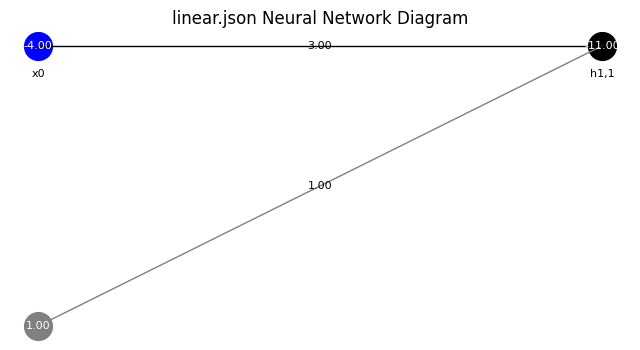

Output 1: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 1: 0.0


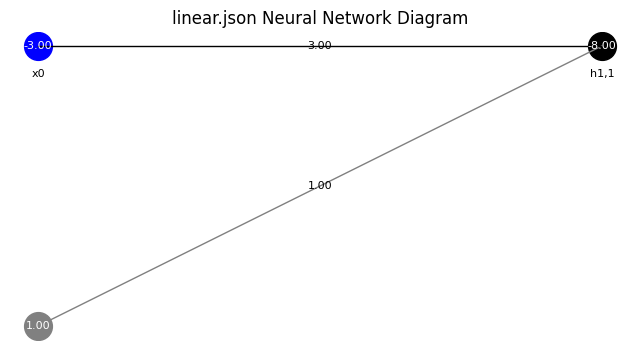

Output 2: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 2: 0.0


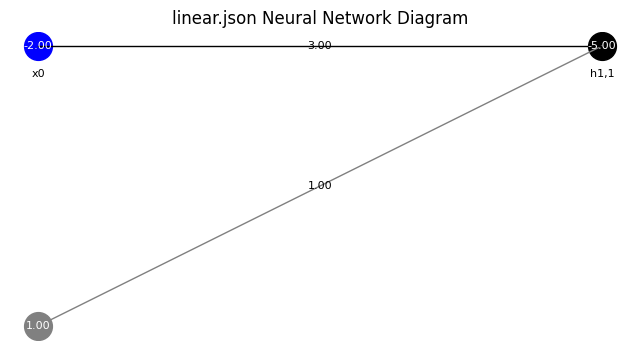

Output 3: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 3: 0.0


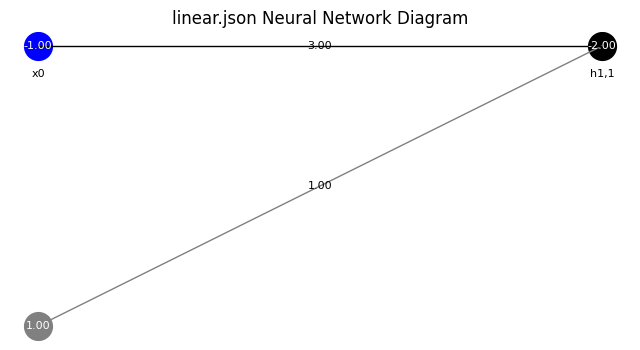

Output 4: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 4: 0.0


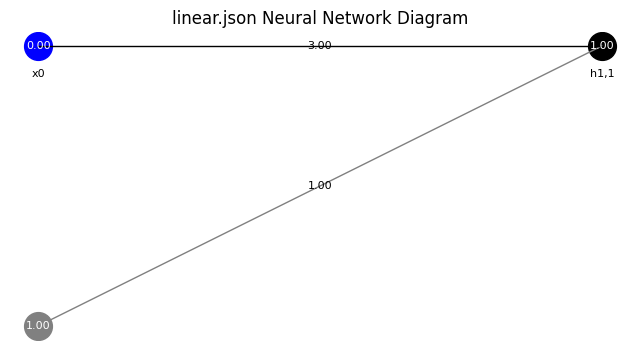

Output 5: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 5: 0.0


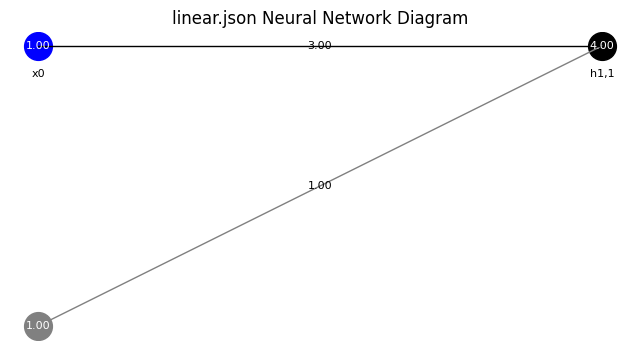

Output 6: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 6: 0.0


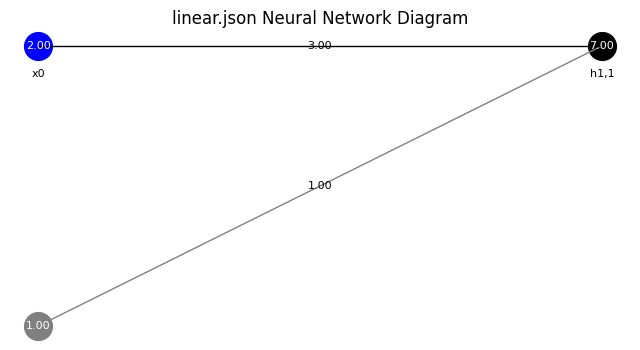

Output 7: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 7: 0.0


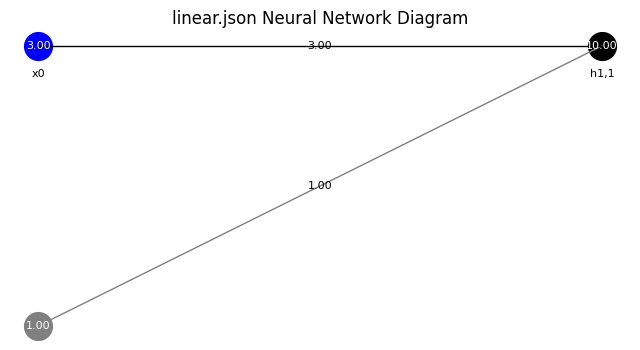

Output 8: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 8: 0.0


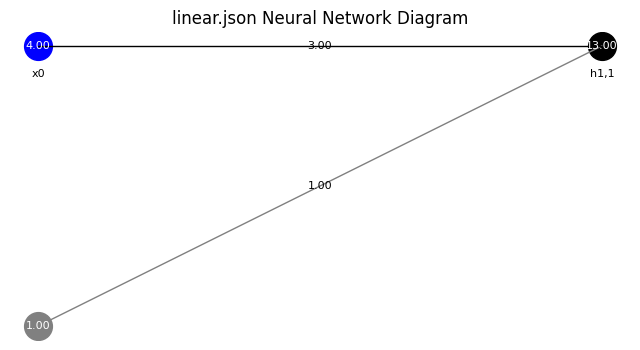

Output 9: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 9: 0.0


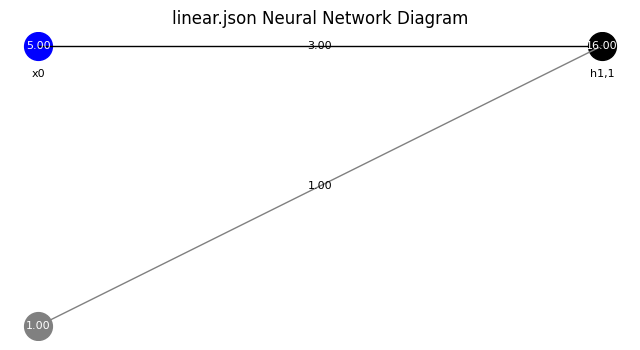

In [189]:
print_process('linear.json')

### Test Case 2: Multilayer Softmax

Output 0: [[0.7042293996883686, 0.2957706003116313]]
SSE 0: 1.942282085801731e-19


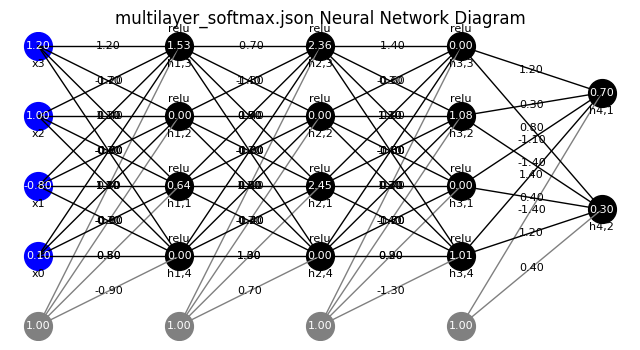

In [190]:
print_process('multilayer_softmax.json')

### Test Case 3: Multilayer

Output 0: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 0: 0.0


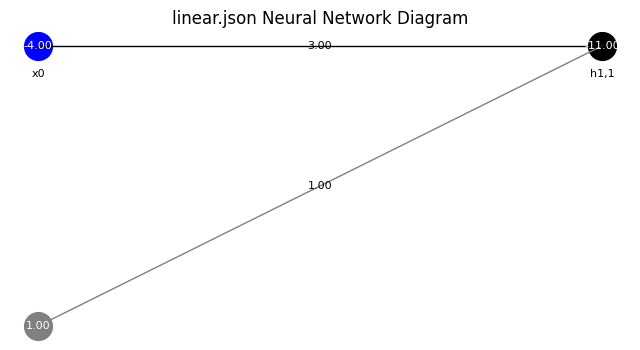

Output 1: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 1: 0.0


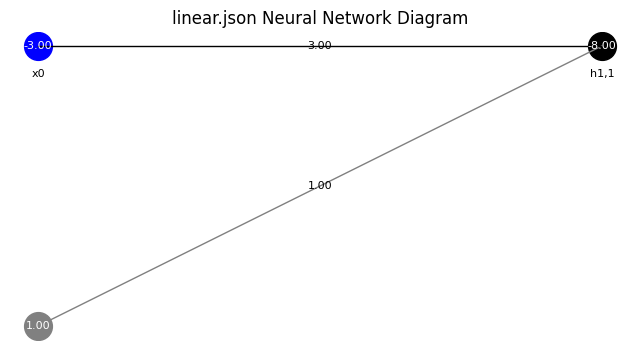

Output 2: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 2: 0.0


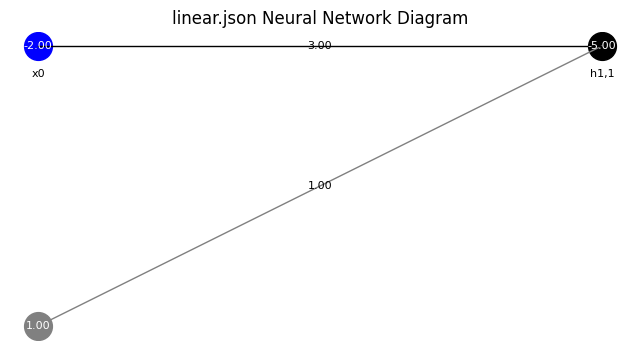

Output 3: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 3: 0.0


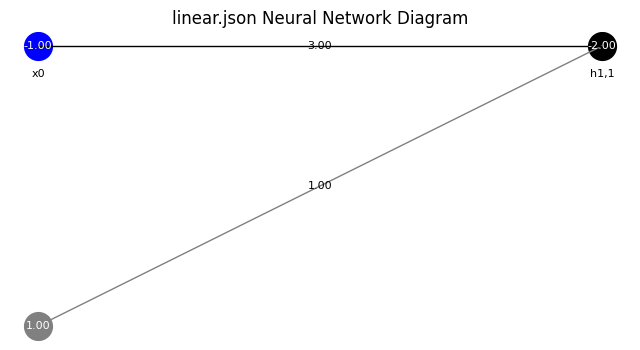

Output 4: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 4: 0.0


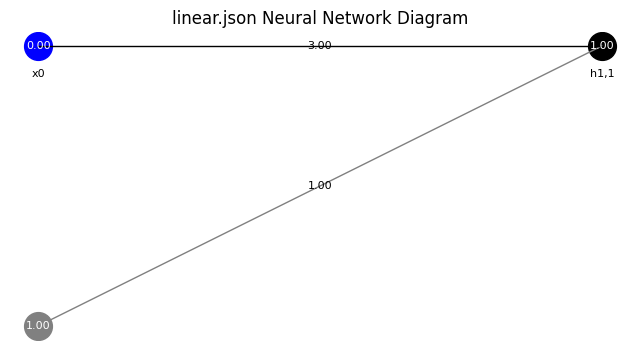

Output 5: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 5: 0.0


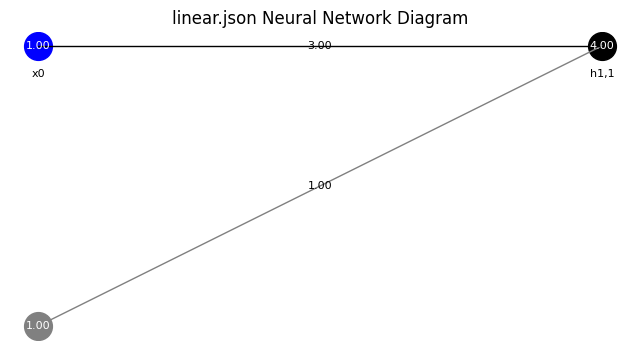

Output 6: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 6: 0.0


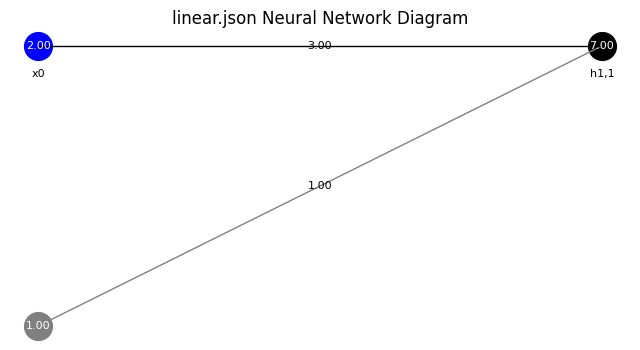

Output 7: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 7: 0.0


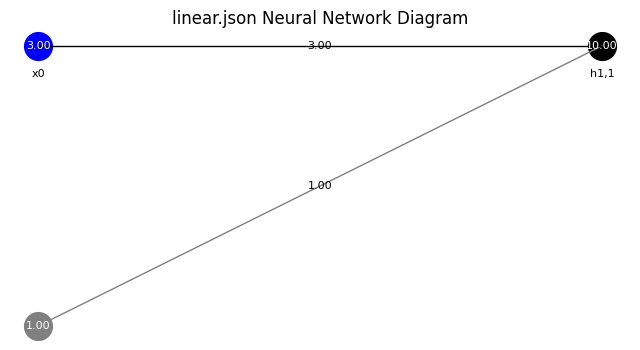

Output 8: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 8: 0.0


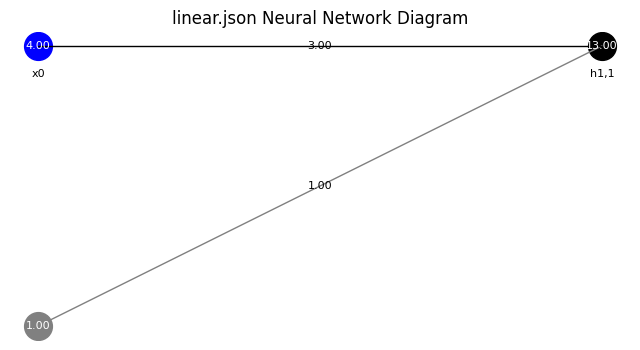

Output 9: [[-11.0], [-8.0], [-5.0], [-2.0], [1.0], [4.0], [7.0], [10.0], [13.0], [16.0]]
SSE 9: 0.0


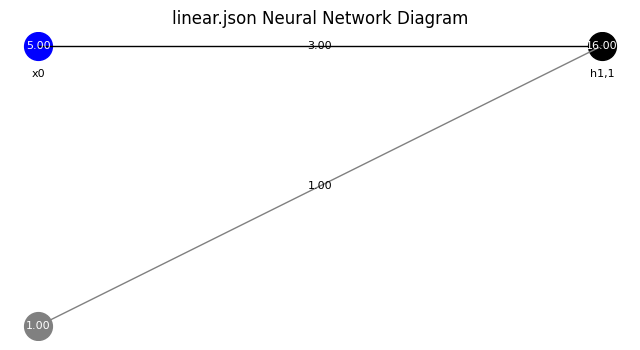

In [191]:
print_process('linear.json')

### Test Case 4: ReLU from Deliverable Docs

Output 0: [[0.04999999999999993, 1.1, 0]]
SSE 0: 4.8148248609680896e-33


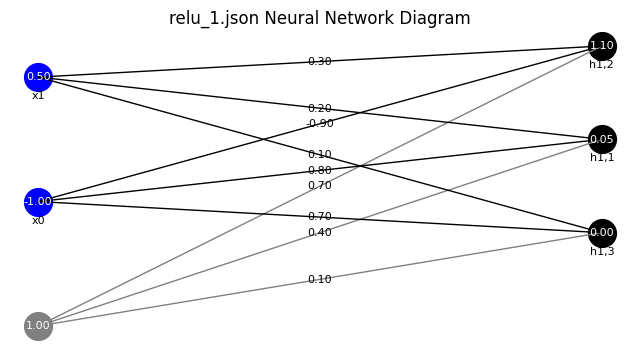

In [193]:
print_process('relu_1.json')

### Test Case 5: ReLU

Output 0: [[0.3099999999999999, 0, 0.3750000000000001]]
SSE 0: 2.465190328815662e-32


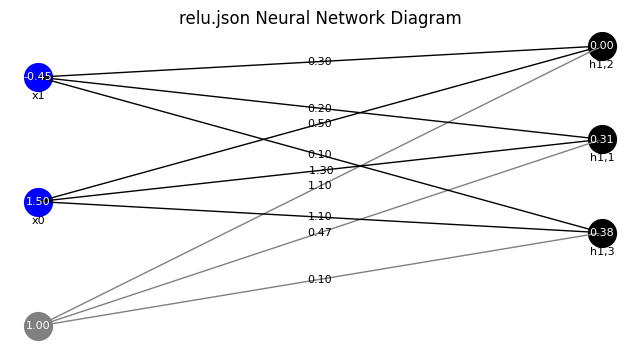

In [194]:
print_process('relu.json')

### Test Case 6: Sigmoid Model

Output 0: [[0.41197345561004917, 0.8314293993694081, 0.5301853632739774, 0.31607396490909706], [0.7826614091150284, 0.8084363083194981, 0.5535051760955713, 0.6427850098146376], [0.5898752435296561, 0.8216095372737501, 0.7543651777362295, 0.34919894670366747], [0.6722003953978934, 0.8166043910016146, 0.5902025844263002, 0.5087098836277426], [0.47322841097431845, 0.8280846566130694, 0.6910545248579614, 0.2935832341653264]]
SSE 0: 5.448747611215099e-17


IndexError: index 3 is out of bounds for axis 0 with size 3

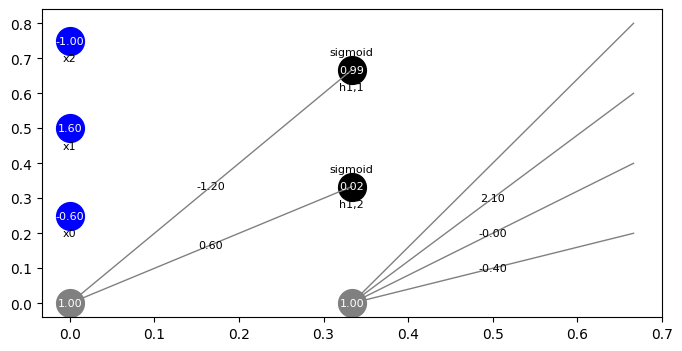

In [195]:
print_process('sigmoid.json')

### Test Case 7: Softmax

Output 0: [[0.7643906087005896, 0.21168068289764497, 0.023928708401765485]]
SSE 0: 1.263916713483999e-17


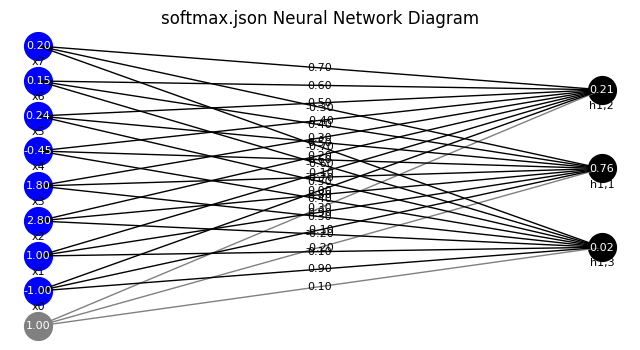

In [196]:
print_process('softmax.json')